<a href="https://colab.research.google.com/github/VejeyPradeep/CE888/blob/master/lab7/DS%26DM_Lab7_exercise4_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "vejeypradeep" # username from the json file
os.environ['KAGGLE_KEY'] = "befb8df93fe4103b8d142d23986bc764" # key from the json file
!kaggle datasets download -d ajaykgp12/cars-wagonr-swift

cars-wagonr-swift.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!ls

cars-wagonr-swift.zip  data  sample_data


In [0]:
!unzip cars-wagonr-swift.zip

In [13]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

Training_data= "data/train"
Testing_data= "data/test"
Validation_data= "data/validation"

training_datagen = ImageDataGenerator(rescale=1./255)
testting_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(Training_data, target_size=(224, 224), batch_size=6, class_mode='binary')

test_generator = testting_datagen.flow_from_directory(Testing_data, target_size=(224, 224), batch_size=6, class_mode='binary')

validation_generator = testting_datagen.flow_from_directory(Validation_data, target_size=(224, 224), batch_size=6, class_mode='binary')

Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [0]:
import keras
from keras.layers import  GlobalAveragePooling2D,Dropout,Dense
from keras.models import Model
from keras.optimizers import Adam
vgg_model = keras.applications.vgg16.VGG16(include_top=False, weights=None,  input_shape=(224,224,3), classes=1)
output_model = vgg_model.output
output_model = GlobalAveragePooling2D()(output_model)
output_model = Dropout(0.3)(output_model)
predict = Dense(1,activation = 'softmax')(output_model)
model = Model(inputs = vgg_model.input, outputs = predict)

model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['acc'])


In [20]:
Train_model = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=10)

Epoch 1/10
100/100 [==============================] - 903s 9s/step - loss: 8.2103 - acc: 0.4850 - val_loss: 6.9084 - val_acc: 0.5667
Epoch 2/10
100/100 [==============================] - 919s 9s/step - loss: 7.9446 - acc: 0.5017 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 3/10
100/100 [==============================] - 922s 9s/step - loss: 7.8915 - acc: 0.5050 - val_loss: 9.2997 - val_acc: 0.4167
Epoch 4/10
100/100 [==============================] - 907s 9s/step - loss: 7.8383 - acc: 0.5083 - val_loss: 8.5026 - val_acc: 0.4667
Epoch 5/10
100/100 [==============================] - 913s 9s/step - loss: 7.6258 - acc: 0.5217 - val_loss: 5.8455 - val_acc: 0.6333
Epoch 6/10
100/100 [==============================] - 936s 9s/step - loss: 8.1306 - acc: 0.4900 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 7/10
100/100 [==============================] - 982s 10s/step - loss: 8.1040 - acc: 0.4917 - val_loss: 10.0968 - val_acc: 0.3667
Epoch 8/10
100/100 [==============================] - 995s 10s/step

In [0]:
model.save('Vgg_Lab7_weights.h5')

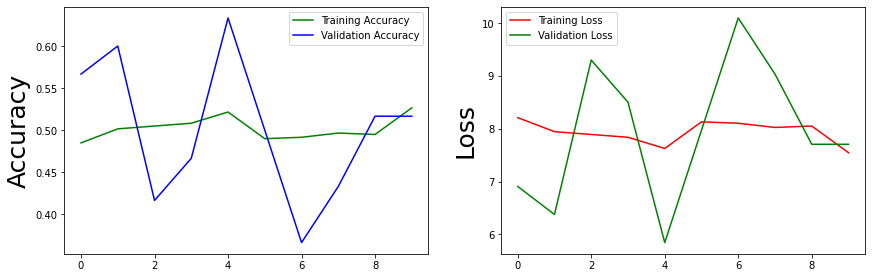

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))

plt.subplot(2, 4, 1)
plt.ylabel('Accuracy', fontsize=25)
plt.plot(Train_model.history['acc'], color='g', label='Training Accuracy')
plt.plot(Train_model.history['val_acc'], color='b', label='Validation Accuracy')
plt.legend()

plt.subplot(2, 4, 2)
plt.ylabel('Loss', fontsize=25)
plt.plot(Train_model.history['loss'], color='r', label='Training Loss')
plt.plot(Train_model.history['val_loss'], color='g', label='Validation Loss')
plt.legend()

plt.show()